In [2]:

import pandas as pd
import numpy as np

df_account = pd.read_csv("account.tsv", sep="\t")
df_client  = pd.read_csv("client.tsv", sep="\t")
df_disp  = pd.read_csv("disp.tsv", sep="\t")
df_pack = pd.read_csv("pack.tsv", sep="\t")
df_trans  = pd.read_csv("trans.tsv", sep="\t")

print("Notebook prêt à l'utilisation !")


/var/folders/v1/gz5q9qkj58l2gkh7wt9m6k3r0000gn/T/ipykernel_9107/302292245.py:8: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_trans  = pd.read_csv("trans.tsv", sep="\t")


Notebook prêt à l'utilisation !


In [3]:
print(df_client.dtypes)
print(df_client.shape)
print(df_client.describe())
print(df_client.count())
print(df_client.nunique())


client_id              int64
birth_date            object
gender                object
client_district_id     int64
dtype: object
(5369, 4)
          client_id  client_district_id
count   5369.000000         5369.000000
mean    3359.011920           37.310114
std     2832.911984           25.043690
min        1.000000            1.000000
25%     1418.000000           14.000000
50%     2839.000000           38.000000
75%     4257.000000           60.000000
max    13998.000000           77.000000
client_id             5369
birth_date            5369
gender                5369
client_district_id    5369
dtype: int64
client_id             5369
birth_date            4738
gender                   2
client_district_id      77
dtype: int64


In [4]:
print(df_account.dtypes)
print(df_account.shape)
print(df_account.describe())
print(df_account.count())
print(df_account.nunique())


account_id              int64
account_district_id     int64
account_date_opened    object
statement_freq         object
dtype: object
(4500, 4)
         account_id  account_district_id
count   4500.000000          4500.000000
mean    2786.067556            37.310444
std     2313.811984            25.177217
min        1.000000             1.000000
25%     1182.750000            13.000000
50%     2368.000000            38.000000
75%     3552.250000            60.000000
max    11382.000000            77.000000
account_id             4500
account_district_id    4500
account_date_opened    4500
statement_freq         4500
dtype: int64
account_id             4500
account_district_id      77
account_date_opened    1535
statement_freq            3
dtype: int64


In [5]:
print(df_disp.dtypes)
print(df_disp.shape)
print(df_disp.describe())
print(df_disp.count())
print(df_disp.nunique())



disp_id        int64
client_id      int64
account_id     int64
type          object
dtype: object
(5369, 4)
            disp_id     client_id    account_id
count   5369.000000   5369.000000   5369.000000
mean    3337.097970   3359.011920   2767.496927
std     2770.418826   2832.911984   2307.843630
min        1.000000      1.000000      1.000000
25%     1418.000000   1418.000000   1178.000000
50%     2839.000000   2839.000000   2349.000000
75%     4257.000000   4257.000000   3526.000000
max    13690.000000  13998.000000  11382.000000
disp_id       5369
client_id     5369
account_id    5369
type          5369
dtype: int64
disp_id       5369
client_id     5369
account_id    4500
type             2
dtype: int64


In [6]:
print(df_pack.dtypes)
print(df_pack.shape)
print(df_pack.describe())
print(df_pack.count())
print(df_pack.nunique())



pack_id       int64
disp_id       int64
pack_type    object
pack_date    object
dtype: object
(892, 4)
           pack_id       disp_id
count   892.000000    892.000000
mean    480.855381   3511.862108
std     306.933982   2984.373626
min       1.000000      9.000000
25%     229.750000   1387.000000
50%     456.500000   2938.500000
75%     684.250000   4459.500000
max    1247.000000  13660.000000
pack_id      892
disp_id      892
pack_type    892
pack_date    892
dtype: int64
pack_id      892
disp_id      892
pack_type      3
pack_date    607
dtype: int64


In [7]:
print(df_trans.dtypes)
print(df_trans.shape)
print(df_trans.describe())
print(df_trans.count())
print(df_trans.nunique())



trans_id                   int64
account_id                 int64
date                      object
trans_amount             float64
balance_after_trans      float64
trans_type                object
trans_operation           object
trans_k_symbol            object
trans_bank_partner        object
trans_account_partner    float64
dtype: object
(1056320, 10)
           trans_id    account_id  trans_amount  balance_after_trans  \
count  1.056320e+06  1.056320e+06  1.056320e+06         1.056320e+06   
mean   1.335311e+06  2.936867e+03  1.866397e+01         3.851833e+03   
std    1.227487e+06  2.477345e+03  1.121353e+03         2.211787e+03   
min    1.000000e+00  1.000000e+00 -8.740000e+03        -4.112570e+03   
25%    4.302628e+05  1.204000e+03 -3.019000e+02         2.240250e+03   
50%    8.585065e+05  2.434000e+03 -1.460000e+00         3.314340e+03   
75%    2.060979e+06  3.660000e+03  2.000000e+01         4.960362e+03   
max    3.682987e+06  1.138200e+04  7.481200e+03         2.096370e+

In [8]:
# Étape 1 : Jointure entre Disposition et Account
df_disp_account = pd.merge(df_disp, df_account, on="account_id", how="outer")

# Étape 2 : Jointure avec Client
df_disp_account_client = pd.merge(df_disp_account, df_client, on="client_id", how="outer")

# Étape 3 : Jointure avec Package
df_full = pd.merge(df_disp_account_client, df_pack, on="disp_id", how="outer")

# Afficher un aperçu du DataFrame final
print("Jointure complète réalisée !")
print(df_full.head())


Jointure complète réalisée !
   disp_id  client_id  account_id type  account_district_id  \
0        1          1           1    O                   18   
1        2          2           2    O                    1   
2        3          3           2    D                    1   
3        4          4           3    O                    5   
4        5          5           3    D                    5   

  account_date_opened statement_freq  birth_date gender  client_district_id  \
0          2015-03-24              M  1990-12-13      F                  18   
1          2013-02-26              M  1965-02-04      M                   1   
2          2013-02-26              M  1960-10-09      F                   1   
3          2017-07-07              M  1976-12-01      M                   5   
4          2017-07-07              M  1980-07-03      F                   5   

   pack_id pack_type pack_date  
0      NaN       NaN       NaN  
1      NaN       NaN       NaN  
2      NaN       N

In [9]:
print(df_full.info())  # Informations générales
print(df_full.isnull().sum())  # Compter les valeurs manquantes par colonne


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   disp_id              5369 non-null   int64  
 1   client_id            5369 non-null   int64  
 2   account_id           5369 non-null   int64  
 3   type                 5369 non-null   object 
 4   account_district_id  5369 non-null   int64  
 5   account_date_opened  5369 non-null   object 
 6   statement_freq       5369 non-null   object 
 7   birth_date           5369 non-null   object 
 8   gender               5369 non-null   object 
 9   client_district_id   5369 non-null   int64  
 10  pack_id              892 non-null    float64
 11  pack_type            892 non-null    object 
 12  pack_date            892 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 545.4+ KB
None
disp_id                   0
client_id                 0
account_id        

In [11]:
print(df_full.dtypes)


disp_id                  int64
client_id                int64
account_id               int64
type                    object
account_district_id      int64
account_date_opened     object
statement_freq          object
birth_date              object
gender                  object
client_district_id       int64
pack_id                float64
pack_type               object
pack_date               object
dtype: object


In [12]:
# Vérification des valeurs manquantes dans le DataFrame fusionné
missing_values = df_full.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values)

# Proportion de valeurs manquantes
missing_percentage = (missing_values / len(df_full)) * 100
print("\nPourcentage de valeurs manquantes par colonne :")
print(missing_percentage)


Valeurs manquantes par colonne :
disp_id                   0
client_id                 0
account_id                0
type                      0
account_district_id       0
account_date_opened       0
statement_freq            0
birth_date                0
gender                    0
client_district_id        0
pack_id                4477
pack_type              4477
pack_date              4477
dtype: int64

Pourcentage de valeurs manquantes par colonne :
disp_id                 0.000000
client_id               0.000000
account_id              0.000000
type                    0.000000
account_district_id     0.000000
account_date_opened     0.000000
statement_freq          0.000000
birth_date              0.000000
gender                  0.000000
client_district_id      0.000000
pack_id                83.386105
pack_type              83.386105
pack_date              83.386105
dtype: float64


In [13]:
# Convertir les dates de naissance en format datetime si nécessaire
df_full['birth_date'] = pd.to_datetime(df_full['birth_date'], errors='coerce')

# Identifier les années les plus anciennes et les plus récentes
earliest_birth = df_full['birth_date'].min()
latest_birth = df_full['birth_date'].max()

print("\nAnnée de naissance la plus ancienne :", earliest_birth)
print("Année de naissance la plus récente :", latest_birth)



Année de naissance la plus ancienne : 1931-08-20 00:00:00
Année de naissance la plus récente : 2007-09-27 00:00:00


In [17]:
# Convertir les dates en format datetime si nécessaire
df_full['account_date_opened'] = pd.to_datetime(df_full['account_date_opened'], errors='coerce')
df_full['pack_date'] = pd.to_datetime(df_full['pack_date'], errors='coerce')

# Définir les dates importantes
start_learning = pd.Timestamp("2015-08-01")  # Début de la période d'apprentissage
end_learning = pd.Timestamp("2016-08-01")   # Fin de la période d'apprentissage

start_validation = pd.Timestamp("2016-08-01")  # Début de la période de validation
end_validation = pd.Timestamp("2017-06-01")    # Fin de la période de validation

# Filtrer les données pour le jeu d'apprentissage
df_training = df_full[(df_full['account_date_opened'] >= start_learning) & 
                      (df_full['account_date_opened'] < end_learning)]

# Filtrer les données pour le jeu de validation
df_validation = df_full[(df_full['account_date_opened'] >= start_validation) & 
                        (df_full['account_date_opened'] < end_validation)]

# Afficher les dimensions des jeux de données
print("Dimensions du jeu d'apprentissage :", df_training.shape)
print("Dimensions du jeu de validation :", df_validation.shape)


Dimensions du jeu d'apprentissage : (1274, 13)
Dimensions du jeu de validation : (1142, 13)


In [22]:
# Définir la période d'accueil pour chaque client avec .loc
df_training.loc[:, 'end_date'] = df_training['account_date_opened'] + pd.DateOffset(months=10)

# Créer la variable score avec .loc
df_training.loc[:, 'score'] = np.where(
    (df_training['pack_date'] >= df_training['account_date_opened']) & 
    (df_training['pack_date'] <= df_training['end_date']),
    1,  # Positif
    0   # Négatif
)

# Vérification des colonnes ajoutées
print(df_training[['account_date_opened', 'end_date', 'pack_date', 'score']].head())


   account_date_opened   end_date pack_date  score
5           2016-02-21 2016-12-21       NaT      0
9           2015-09-21 2016-07-21       NaT      0
10          2015-09-21 2016-07-21       NaT      0
13          2015-10-10 2016-08-10       NaT      0
30          2016-07-28 2017-05-28       NaT      0


In [23]:
# Compter les positifs et négatifs
score_counts = df_training['score'].value_counts()
score_proportion = score_counts / len(df_training) * 100

print("Répartition des scores :")
print("Négatifs (0) :", score_proportion[0], "%")
print("Positifs (1) :", score_proportion[1], "%")


Répartition des scores :
Négatifs (0) : 97.8806907378336 %
Positifs (1) : 2.119309262166405 %


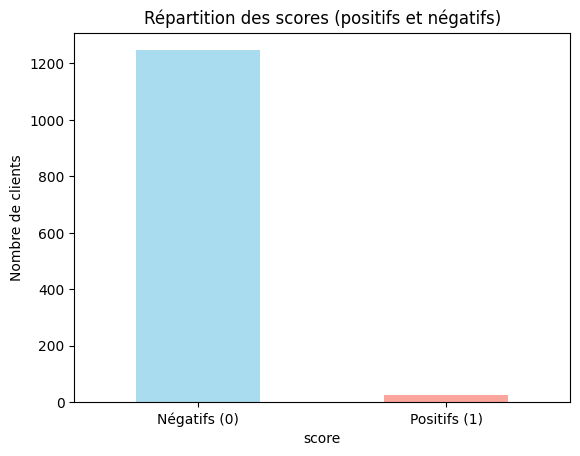

In [24]:
import matplotlib.pyplot as plt

# Visualisation des scores
score_counts.plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.7)
plt.title("Répartition des scores (positifs et négatifs)")
plt.xticks(ticks=[0, 1], labels=["Négatifs (0)", "Positifs (1)"], rotation=0)
plt.ylabel("Nombre de clients")
plt.show()
